# Credit Card Application Model

We'll start by preprocessing the data

## General Preprocessing

In [1]:
import pandas as pd

applicationRecord = pd.read_csv('application_record.csv')
creditRecord = pd.read_csv('credit_record.csv')

#Get counts of application record and credit record
print(creditRecord.count())
print("\n")
print(applicationRecord.count())

ID                1048575
MONTHS_BALANCE    1048575
STATUS            1048575
dtype: int64


ID                     438557
CODE_GENDER            438557
FLAG_OWN_CAR           438557
FLAG_OWN_REALTY        438557
CNT_CHILDREN           438557
AMT_INCOME_TOTAL       438557
NAME_INCOME_TYPE       438557
NAME_EDUCATION_TYPE    438557
NAME_FAMILY_STATUS     438557
NAME_HOUSING_TYPE      438557
DAYS_BIRTH             438557
DAYS_EMPLOYED          438557
FLAG_MOBIL             438557
FLAG_WORK_PHONE        438557
FLAG_PHONE             438557
FLAG_EMAIL             438557
OCCUPATION_TYPE        304354
CNT_FAM_MEMBERS        438557
dtype: int64


### Observations

There exist two obvious issues:
1. The number of application records is less than the number of credit records
2. The OCCUPATION_TYPE column has less values than the rest of the columns (suggesting NA values in play)

The first thing we'll begin doing is prune the columns we do not need to use in the applicationRecord set:
CODE_GENDER, CNT_CHILDREN, FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS

In [2]:
#First we'll look at our columns before the drop
applicationRecord.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [3]:
#Drop the unnecessary columns and check our new set of columns
applicationRecord = applicationRecord.drop(columns=["CODE_GENDER", 
                                          "CNT_CHILDREN", 
                                          "FLAG_MOBIL", 
                                          "FLAG_WORK_PHONE", 
                                          "FLAG_PHONE",
                                          "FLAG_EMAIL",
                                          "OCCUPATION_TYPE",
                                          "CNT_FAM_MEMBERS"])
applicationRecord.columns

Index(['ID', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED'],
      dtype='object')

### What next?

Now that we have the only columns we need, we can merge the two dataframes called "comprehensive", which includes the columns of both dataframes while also aligning the data from one ID to its corresponding data from both datasets

In [4]:
comprehensive = pd.merge(applicationRecord, creditRecord)
comprehensive.shape

(777715, 12)

In [5]:
comprehensive.head(20)

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,MONTHS_BALANCE,STATUS
0,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,0,C
1,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,-1,C
2,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,-2,C
3,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,-3,C
4,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,-4,C
5,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,-5,C
6,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,-6,C
7,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,-7,C
8,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,-8,C
9,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,-9,C


### Observations
We have multiple entries for the same person, which is important to keep for the sake of better understanding when we throw the data into an unsupervised ML model. We may be able to gain insight into something like their balance or status in relation to some other data point we haven't yet considered. 

Moving from this,  our "DAYS_BIRTH" column is incredibly unintuitive for humans to read, so our next step will be to convert it to years. And because the we don't care about fractions of a year, we'll use floor division. Additionally we'll adjust the "DAYS_EMPLOYED" and "MONTHS_BALANCE" columns to positive values

In [6]:
#Divide the DAYS_BIRTH to years for our use
import numpy as np
comprehensive["DAYS_BIRTH"] = comprehensive["DAYS_BIRTH"].div(-365).apply(np.floor)

#We divided by -365 to get the values from negative to positive

In [7]:
#Rename DAYS_BIRTH to YEARS_OLD
comprehensive = comprehensive.rename(columns={"DAYS_BIRTH":"YEARS_OLD"})
comprehensive.head(100)

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_OLD,DAYS_EMPLOYED,MONTHS_BALANCE,STATUS
0,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,-4542,0,C
1,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,-4542,-1,C
2,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,-4542,-2,C
3,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,-4542,-3,C
4,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,-4542,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...
95,5008810,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,-3051,-24,0
96,5008810,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,-3051,-25,X
97,5008810,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,-3051,-26,X
98,5008811,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,-3051,0,C


In [8]:
#Adjust "DAYS_EMPLOYED" and "MONTHS BALANCE"
comprehensive["DAYS_EMPLOYED"] = comprehensive["DAYS_EMPLOYED"].div(-1)
comprehensive["MONTHS_BALANCE"] = comprehensive["MONTHS_BALANCE"].div(-1)
comprehensive.head(100)

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_OLD,DAYS_EMPLOYED,MONTHS_BALANCE,STATUS
0,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,-0.0,C
1,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,1.0,C
2,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,2.0,C
3,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,3.0,C
4,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
95,5008810,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,3051.0,24.0,0
96,5008810,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,3051.0,25.0,X
97,5008810,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,3051.0,26.0,X
98,5008811,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,3051.0,-0.0,C


### Now what?
Let's check for null values to make sure data set is complete then export for usage in other models

In [9]:
comprehensive.isnull().sum()


ID                     0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
YEARS_OLD              0
DAYS_EMPLOYED          0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

In [10]:
#Unique ID vals
print(len(pd.unique(comprehensive["ID"])))

36457


## Exploration: Diving into K-Means Clustering

We'll first need to modify the values of the "STATUS" columns to be numerical for the sake of clustering

In [11]:
#Replace "STATUS" column values with 1 (low risk/likely to approve), 0 (high risk/unlikely to approve)

replace_dict = {"C" : 1,
               "X": 1,
               "0": 1,
               "1": 0,
               "2": 0,
               "3": 0,
               "4": 0,
               "5": 0}

comprehensive.replace({"STATUS": replace_dict}, inplace=True)


Now that we have the data *mostly* prepped for clustering we can begin looking at the features we want to use for K-Means clustering. Using all the columns is unlikely to give usable data for analysis, so we'll cut it down to two feature inputs (columns): x and "STATUS", where x is a column that has some potential relevance to the "STATUS" column like "DAYS_EMPLOYED". 

The importance of the "STATUS" column cannot be understated enough because it is the largest factor for creditors to assess creditworthiness. For FICO Scores, 35% of the score is based on Payment History (https://www.myfico.com/credit-education/whats-in-your-credit-score), and this column is our closest approximation to that data point.  

The idea for this section is to see if there exist any clear relationships within any of the other columns (x) and the "STATUS" column

In [12]:
# Preserve the data for future use
comprehensive.to_csv('updatedMergedApplicationCreditRecords.csv')

In [13]:
comprehensive.head(20)

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_OLD,DAYS_EMPLOYED,MONTHS_BALANCE,STATUS
0,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,-0.0,1
1,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,1.0,1
2,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,2.0,1
3,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,3.0,1
4,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,4.0,1
5,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,5.0,1
6,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,6.0,1
7,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,7.0,1
8,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,8.0,1
9,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,9.0,1


In [14]:
#Now filter for only unique IDs to avoid confusion
comprehensive = comprehensive.drop_duplicates("ID")
comprehensive.size

437484

### Feature Selection
We'll start off with the following combinations to analyze for clustering:

1. AMT_INCOME_TOTAL and STATUS
2. NAME_INCOME_TYPE and STATUS
3. NAME_EDUCATION_TYPE and STATUS
4. DAYS_EMPLOYED and STATUS
5. MONTHS_BALANCE and STATUS
6. FLAG_OWN_REALTY and STATUS

#### AMT_INCOME_TOTAL and STATUS

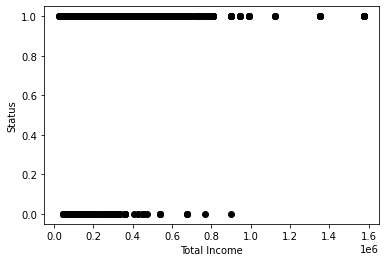

,AMT_INCOME_TOTAL,STATUS
0,2.365845,0.102903
1,2.365845,0.102903
2,-0.728827,0.102903
3,0.818509,0.102903
4,0.818509,0.102903


In [15]:
import random as rd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# AMT_INCOME_TOTAL and STATUS -> My initial guess would be little to no real value of information gained from AMT_INCOME_TOTAL
comprehensive = comprehensive.drop_duplicates("ID")
#Load and plot data to visually understand what data looks like
df1 = comprehensive[["AMT_INCOME_TOTAL", "STATUS"]].copy()
plt.scatter(df1["AMT_INCOME_TOTAL"], df1["STATUS"], c = "black")
plt.xlabel("Total Income")
plt.ylabel("Status")
plt.show()

#Scale the data for K-Means and output resulting scaled values
scaler = StandardScaler()
scaledDF1 = scaler.fit_transform(df1)
scaledDF1 = pd.DataFrame(scaledDF1, columns = df1.columns)
scaledDF1.head()

Text(0, 0.5, 'Inertia')

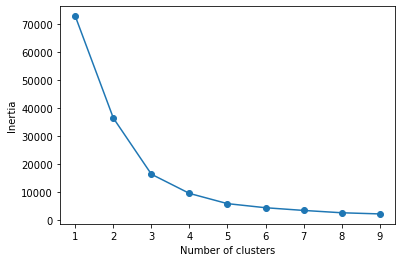

In [16]:
# Source: https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
# In order to determine which number of clusters we should use, we'll run though a series of tests
# Takes some time to run (30-45 seconds)
from sklearn.cluster import KMeans

output = []
for cluster in range(1, 10):
    kmeans = KMeans(n_clusters = cluster, init="k-means++")
    kmeans.fit(scaledDF1)
    output.append(kmeans.inertia_)
    
#Plot the data to visually determine number of clusters
graph = pd.DataFrame({"Cluster":range(1,10), "Output":output})
plt.plot(graph["Cluster"], graph["Output"], marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

In [17]:
#Looks like 3 clusters would work well, so now we'll create the model using 3 clusters (Elbow Method)
kmeans = KMeans(n_clusters = 3, init="k-means++")
kmeans.fit(scaledDF1)
scaledDF1["cluster"] = kmeans.predict(scaledDF1)

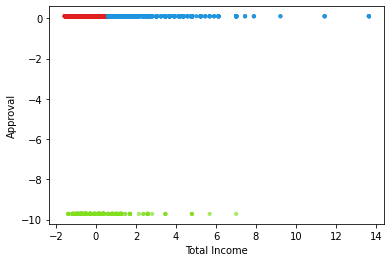

In [18]:
#Visualize the data
centers = kmeans.cluster_centers_
cen_x = [i[0] for i in centers]
cen_y = [i[1] for i in centers]

scaledDF1["cen_x"] = scaledDF1.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
scaledDF1["cen_y"] = scaledDF1.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['#DF2020', '#81DF20', '#2095DF']
scaledDF1["c"] = scaledDF1.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.xlabel("Total Income")
plt.ylabel("Approval")
plt.scatter(scaledDF1.AMT_INCOME_TOTAL, scaledDF1.STATUS, c = scaledDF1.c, alpha = 0.6, s = 10)

In [19]:
scaledDF1.head()

,AMT_INCOME_TOTAL,STATUS,cluster,cen_x,cen_y,c
0,2.365845,0.102903,2,1.465512,0.102903,#2095DF
1,2.365845,0.102903,2,1.465512,0.102903,#2095DF
2,-0.728827,0.102903,0,-0.381260,0.102903,#DF2020
3,0.818509,0.102903,2,1.465512,0.102903,#2095DF
4,0.818509,0.102903,2,1.465512,0.102903,#2095DF


##### Observation
Based on this clustering, it is clear that higher income individuals tend to be less risky for lending as they pay their debts on time. We can use this idea to reduce how strict we are with higher income individuals during another wave of data processing

It is also important to note why StandardScaler was used here as opposed to MinMaxScaler. StandardScaler was used as way to keep the importance of outliers. There was a concern that if MinMaxScaler was used, then it would have caused issues with getting a fuller picture of the data

#### NAME_INCOME_TYPE and STATUS

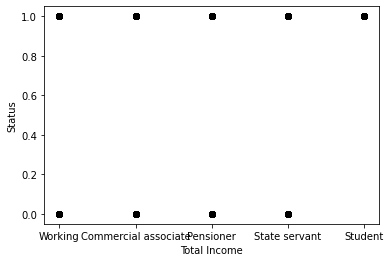

In [20]:
# NAME_INCOME_TYPE and STATUS -> My initial guess would be no real value of information gained from NAME_INCOME_TYPE

#Load and plot data to visually understand what data looks like
df2 = comprehensive[["NAME_INCOME_TYPE", "STATUS"]].copy()
plt.scatter(df2["NAME_INCOME_TYPE"], df2["STATUS"], c = "black")
plt.xlabel("Total Income")
plt.ylabel("Status")
plt.show()

Due to its categorical nature, NAME_INCOME_TYPE has only discrete values. Based on this plot, there is no way of differentiating Income Type and Status, thus k-means clustering will not be helpful here

#### NAME_EDUCATION_TYPE and STATUS

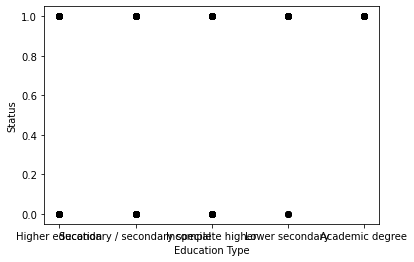

In [21]:
# NAME_EDUCATION_TYPE and STATUS -> My initial guess would be no real value of information gained from NAME_EDUCATION_TYPE

#Load and plot data to visually understand what data looks like
df3 = comprehensive[["NAME_EDUCATION_TYPE", "STATUS"]].copy()
plt.scatter(df3["NAME_EDUCATION_TYPE"], df3["STATUS"], c = "black")
plt.xlabel("Education Type")
plt.ylabel("Status")
plt.show()

Due to its categorical nature, NAME_EDUCATION_TYPE has only discrete values. Based on this plot, there is no way of differentiating Education Type and Status, thus k-means clustering will not be helpful here

#### DAYS_EMPLOYED and STATUS

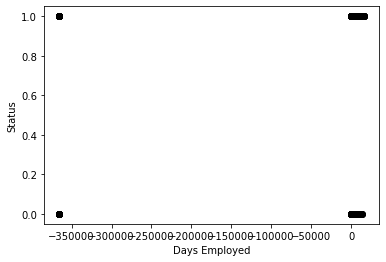

In [22]:
# DAYS_EMPLOYED and STATUS

#Load and plot data to visually understand what data looks like
df4 = comprehensive[["DAYS_EMPLOYED", "STATUS"]].copy()
plt.scatter(df4["DAYS_EMPLOYED"], df4["STATUS"], c = "black")
plt.xlabel("Days Employed")
plt.ylabel("Status")
plt.show()

In [23]:
# Looks like there might be some data here that we could use (we'll definitely need to scale data)
# Scale the data for K-Means and output resulting scaled values
scaler = StandardScaler()
scaledDF4 = scaler.fit_transform(df4)
scaledDF4 = pd.DataFrame(scaledDF4, columns = df4.columns)
scaledDF4.head()

,DAYS_EMPLOYED,STATUS
0,0.463532,0.102903
1,0.463532,0.102903
2,0.438774,0.102903
3,0.452700,0.102903
4,0.452700,0.102903


Text(0, 0.5, 'Inertia')

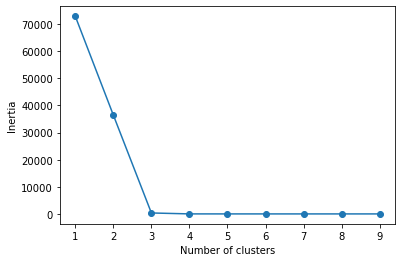

In [24]:
# Source: https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
# In order to determine which number of clusters we should use, we'll run though a series of tests
# Takes some time to run (10-15 seconds)
from sklearn.cluster import KMeans

output = []
for cluster in range(1, 10):
    kmeans = KMeans(n_clusters = cluster, init="k-means++")
    kmeans.fit(scaledDF4)
    output.append(kmeans.inertia_)
    
#Plot the data to visually determine number of clusters
graph = pd.DataFrame({"Cluster":range(1,10), "Output":output})
plt.plot(graph["Cluster"], graph["Output"], marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

In [25]:
# Interesting behavior with number of clusters, going to use 3 clusters from Elbow Method
kmeans = KMeans(n_clusters = 3, init="k-means++")
kmeans.fit(scaledDF4)
scaledDF4["cluster"] = kmeans.predict(scaledDF4)

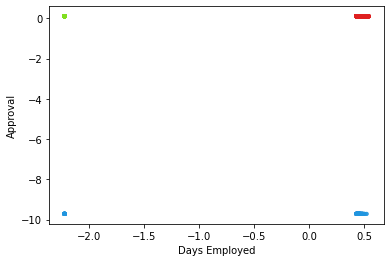

In [26]:
#Visualize the data
centers = kmeans.cluster_centers_
cen_x = [i[0] for i in centers]
cen_y = [i[1] for i in centers]

scaledDF4["cen_x"] = scaledDF4.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
scaledDF4["cen_y"] = scaledDF4.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['#DF2020', '#81DF20', '#2095DF']
scaledDF4["c"] = scaledDF4.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.xlabel("Days Employed")
plt.ylabel("Approval")
plt.scatter(scaledDF4.DAYS_EMPLOYED, scaledDF4.STATUS, c = scaledDF4.c, alpha = 0.6, s = 10)

##### Observations

Ignoring the bizarre scaling for the "Approval" axis (Higher still means less risky/ more likely to be approved), we can observe interesting behavior as we see a similar clustering pattern to the total income cluster (df1)

#### MONTHS_BALANCE AND STATUS

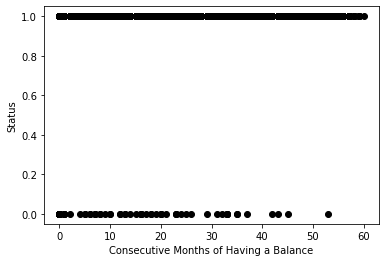

In [27]:
# MONTHS_BALANCE and STATUS

#Load and plot data to visually understand what data looks like
df5 = comprehensive[["MONTHS_BALANCE", "STATUS"]].copy()
plt.scatter(df5["MONTHS_BALANCE"], df5["STATUS"], c = "black")
plt.xlabel("Consecutive Months of Having a Balance")
plt.ylabel("Status")
plt.show()

In [28]:
# Looks like there might be some data here that we could use (we'll definitely need to scale data)
# Scale the data for K-Means and output resulting scaled values
scaler = StandardScaler()
scaledDF5 = scaler.fit_transform(df5)
scaledDF5 = pd.DataFrame(scaledDF5, columns = df5.columns)
scaledDF5.head()

,MONTHS_BALANCE,STATUS
0,-0.514889,0.102903
1,-0.514889,0.102903
2,-0.514889,0.102903
3,-0.514889,0.102903
4,1.427487,0.102903


Text(0, 0.5, 'Inertia')

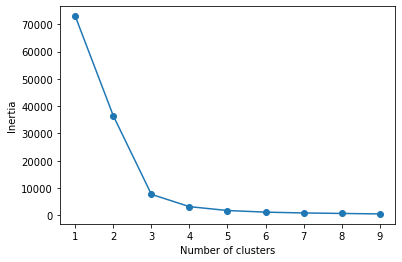

In [29]:
# Source: https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
# In order to determine which number of clusters we should use, we'll run though a series of tests
# Takes some time to run (10-15 seconds)

output = []
for cluster in range(1, 10):
    kmeans = KMeans(n_clusters = cluster, init="k-means++")
    kmeans.fit(scaledDF5)
    output.append(kmeans.inertia_)
    
#Plot the data to visually determine number of clusters
graph = pd.DataFrame({"Cluster":range(1,10), "Output":output})
plt.plot(graph["Cluster"], graph["Output"], marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

In [30]:
#Looks like 3 clusters would work well, so now we'll create the model using 3 clusters (Elbow Method)
kmeans = KMeans(n_clusters = 3, init="k-means++")
kmeans.fit(scaledDF5)
scaledDF5["cluster"] = kmeans.predict(scaledDF5)

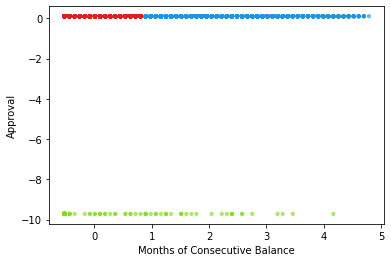

In [31]:
#Visualize the data
centers = kmeans.cluster_centers_
cen_x = [i[0] for i in centers]
cen_y = [i[1] for i in centers]

scaledDF5["cen_x"] = scaledDF5.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
scaledDF5["cen_y"] = scaledDF5.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['#DF2020', '#81DF20', '#2095DF']
scaledDF5["c"] = scaledDF5.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.xlabel("Months of Consecutive Balance")
plt.ylabel("Approval")
plt.scatter(scaledDF5.MONTHS_BALANCE, scaledDF5.STATUS, c = scaledDF5.c, alpha = 0.6, s = 10)

##### Observations

Ignoring the bizarre scaling for the "Approval" axis (Higher still means less risky/ more likely to be approved), we can observe interesting behavior as we see a similar clustering pattern to both the total income cluster (df1) and days employed cluster (df4).

### Next Step
Our next step will likely include all three continuous columns (df1, df4, and df5) into a clustering to see if we can find anything that aligns with typical credit lending (we'll likely have to follow a more mortgage-like approach given the limitations of our current dataset)

In [32]:
# AMT_INCOME_TOTAL, DAYS_EMPLOYED, MONTHS_BALANCE and STATUS

#Load and plot data to visually understand what data looks like
df6 = comprehensive[["AMT_INCOME_TOTAL", "DAYS_EMPLOYED", "MONTHS_BALANCE", "STATUS"]].copy()

# Scale the data for K-Means and output resulting scaled values
scaler = StandardScaler()
scaledDF6 = scaler.fit_transform(df6)
scaledDF6 = pd.DataFrame(scaledDF6, columns = df6.columns)
scaledDF6.head()

,AMT_INCOME_TOTAL,DAYS_EMPLOYED,MONTHS_BALANCE,STATUS
0,2.365845,0.463532,-0.514889,0.102903
1,2.365845,0.463532,-0.514889,0.102903
2,-0.728827,0.438774,-0.514889,0.102903
3,0.818509,0.452700,-0.514889,0.102903
4,0.818509,0.452700,1.427487,0.102903


Text(0, 0.5, 'Inertia')

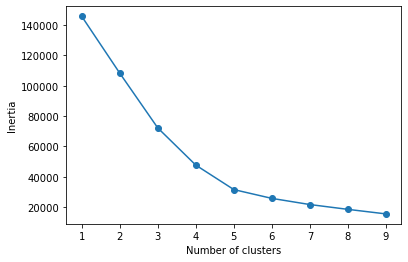

In [33]:
# In order to determine which number of clusters we should use, we'll run though a series of tests
# Takes some time to run (10-15 seconds)

output = []
for cluster in range(1, 10):
    kmeans = KMeans(n_clusters = cluster, init="k-means++")
    kmeans.fit(scaledDF6)
    output.append(kmeans.inertia_)
    
#Plot the data to visually determine number of clusters
graph = pd.DataFrame({"Cluster":range(1,10), "Output":output})
plt.plot(graph["Cluster"], graph["Output"], marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

In [34]:
#Looks like 5 clusters would work well, so now we'll create the model using 5 clusters (Elbow Method)
kmeans = KMeans(n_clusters = 5, init="k-means++")
kmeans.fit(scaledDF6)
scaledDF6["cluster"] = kmeans.predict(scaledDF6)

In [35]:
scaledDF6.head()

,AMT_INCOME_TOTAL,DAYS_EMPLOYED,MONTHS_BALANCE,STATUS,cluster
0,2.365845,0.463532,-0.514889,0.102903,3
1,2.365845,0.463532,-0.514889,0.102903,3
2,-0.728827,0.438774,-0.514889,0.102903,0
3,0.818509,0.452700,-0.514889,0.102903,3
4,0.818509,0.452700,1.427487,0.102903,4


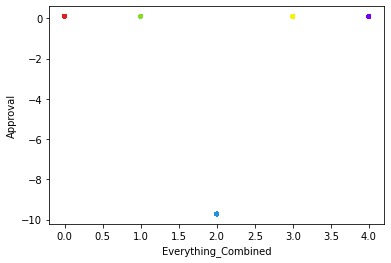

In [36]:
#Visualize the data
centers = kmeans.cluster_centers_
cen_x = [i[0] for i in centers]
cen_y = [i[1] for i in centers]

scaledDF6["cen_x"] = scaledDF6.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3], 4:cen_x[4]})
scaledDF6["cen_y"] = scaledDF6.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3], 4:cen_y[4]})

colors = ['#DF2020', '#81DF20', '#2095DF', '#F5F500', '#7600f5']
scaledDF6["c"] = scaledDF6.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

plt.xlabel("Everything_Combined")
plt.ylabel("Approval")
plt.scatter(scaledDF6.cluster, scaledDF6.STATUS, c = scaledDF6.c, alpha = 0.6, s = 10)

##### Observations

Cluster 3 seems to be the highest risk applicants. A futher analysis is needed to determine the characteristics of cluster 3 individuals

In [37]:
cluster3 = scaledDF6[scaledDF6["cluster"] == 3]
cluster3.head()

,AMT_INCOME_TOTAL,DAYS_EMPLOYED,MONTHS_BALANCE,STATUS,cluster,cen_x,cen_y,c
0,2.365845,0.463532,-0.514889,0.102903,3,1.690448,0.419539,#F5F500
1,2.365845,0.463532,-0.514889,0.102903,3,1.690448,0.419539,#F5F500
3,0.818509,0.452700,-0.514889,0.102903,3,1.690448,0.419539,#F5F500
5,0.818509,0.452700,-0.514889,0.102903,3,1.690448,0.419539,#F5F500
6,0.818509,0.452700,-0.514889,0.102903,3,1.690448,0.419539,#F5F500


In [38]:
cluster3 = cluster3.drop(columns=["cluster", "cen_x", "cen_y", "c"])

In [39]:
cluster3.head()

,AMT_INCOME_TOTAL,DAYS_EMPLOYED,MONTHS_BALANCE,STATUS
0,2.365845,0.463532,-0.514889,0.102903
1,2.365845,0.463532,-0.514889,0.102903
3,0.818509,0.452700,-0.514889,0.102903
5,0.818509,0.452700,-0.514889,0.102903
6,0.818509,0.452700,-0.514889,0.102903


In [40]:
cluster3 = scaler.inverse_transform(cluster3)

In [41]:
invertedCluster3 = pd.DataFrame(cluster3, columns = df6.columns)
invertedCluster3.head()

,AMT_INCOME_TOTAL,DAYS_EMPLOYED,MONTHS_BALANCE,STATUS
0,427500.0,4542.0,0.0,1.0
1,427500.0,4542.0,0.0,1.0
2,270000.0,3051.0,0.0,1.0
3,270000.0,3051.0,0.0,1.0
4,270000.0,3051.0,0.0,1.0


In [42]:
highest_income = invertedCluster3["AMT_INCOME_TOTAL"].max()
print(highest_income)

1575000.0


#### Observations

Going back to the total income vs status scatter plot from earlier, we can see that the 900000 income is in line with the highest income that was observed. From this, we find that incomes within the low seven figures are highly unlikely to pay their bills late (if ever), and our credit model should be more lenient on those with extremely high incomes

### Conclusions From Clustering

We have developed a better sense of what makes a borrower less risky by juxtaposing specific characteristics like total income with their status on how late their payments are. This is in line with our intuition of how risky someone can be if they have a lower income vs a higher income. You are far more likely to lend money to someone who has the means to pay you back, and in our case a higher income individual will have that capacity to do so. Based on our observations through clustering, we have confirmed that very high income individuals are far less riskier to lend to

## Extraneous Analysis: Exploring the Data Beyond Clustering

We should take a closer look at the numbers between owning property and approval chances as that may give us another important data point to consider

#### FLAG_OWN_REALTY and STATUS

In [43]:
# FLAG_OWN_REALTY and STATUS
df7 = comprehensive[["FLAG_OWN_REALTY", "STATUS"]].copy()
df7["FLAG_OWN_REALTY"].value_counts()

Y    24506
N    11951
Name: FLAG_OWN_REALTY, dtype: int64

In [44]:
# How many people own property and were approved
df7[(df7.FLAG_OWN_REALTY == "Y") & (df7.STATUS == 1)].count()

FLAG_OWN_REALTY    24259
STATUS             24259
dtype: int64

In [45]:
#How many people do not own property and were approved
df7[(df7.FLAG_OWN_REALTY == "N") & (df7.STATUS == 1)].count()

FLAG_OWN_REALTY    11816
STATUS             11816
dtype: int64

In [46]:
# How many people do own property and were not approved
df7[(df7.FLAG_OWN_REALTY == "Y") & (df7.STATUS == 0)].count()

FLAG_OWN_REALTY    247
STATUS             247
dtype: int64

In [47]:
# How many people do not own property and were not approved
df7[(df7.FLAG_OWN_REALTY == "N") & (df7.STATUS == 0)].count()

FLAG_OWN_REALTY    135
STATUS             135
dtype: int64

### Conclusions from Extraneous Analysis

We find that people who own property are very unlikely to miss on a payment for longer than a 30 day window. This could also be very useful for reducing the strictness of our model on individuals who own property, giving them more leg room to be approved